# pandas

データ分析の代表格、統計分析とかもですが、データ処理や、グラフ表示もできるので脱EXCELに向けて勉強するならこちらがオススメ。

一番よくまとまっているサイト
[StatsFragments Python, R, Rust, 統計, 機械学習とか](http://sinhrks.hatenablog.com/entry/2015/04/28/235430)

## DataFrame
excelで言うとこのシートと同じ意味合い。ただしカラムと列になんでも入れることはできない。


In [2]:
import pandas as pd #pdと省略して使うことが慣例見たい。

In [19]:
#おまじない１ jupyter notebook 上で実行する場合にグラフを表示するため、ターミナルでは不要です。
%matplotlib inline

#おまじない２ グラフが綺麗になる。
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [58]:
df=pd.DataFrame(columns=['a','b','c'], data=[[1,2,3],[4,5,6],[7,8,9]])
df #行の頭（0,1,2）はindex、列はcolumnとなる。

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [61]:
df['a'] #columnを指定して抽出

0    1
1    4
2    7
Name: a, dtype: int64

In [63]:
df[['a','b']] #複数column指定

,a,b
0,1,2
1,4,5
2,7,8


In [66]:
df.loc[1,'b'] #locでは[index,column]を指定できる。

5

In [67]:
df.loc[2,:] # : は全てを表示する

a    7
b    8
c    9
Name: 2, dtype: int64

In [70]:
df.describe() #統計値を表示できる。（数値int,float系の場合は平均とか、中央値など）

,a,b,c
count,3.0,3.0,3.0
mean,4.0,5.0,6.0
std,3.0,3.0,3.0
min,1.0,2.0,3.0
25%,2.5,3.5,4.5
50%,4.0,5.0,6.0
75%,5.5,6.5,7.5
max,7.0,8.0,9.0


## Series
DataFrameの１列単位はSeriesとなる。Seriesでしか利用できないものがある。

In [76]:
se=pd.Series(data=[1,2,3,1,2,2,2,3,3,3])
se

0    1
1    2
2    3
3    1
4    2
5    2
6    2
7    3
8    3
9    3
dtype: int64

In [77]:
se.value_counts() #Seriesでよく使うvalue_counts()メソッド、各値の出現回数をカウントしてくる。

3    4
2    4
1    2
dtype: int64

## 統計分析
いくつか処理を実施してみる。

同一フォルダにおいてあるdata.csvファイルをプロジェクト配下にダウンロードしてください。

In [5]:
df=pd.read_csv('105_data.csv',index_col='年月日')#csvは直接DataFrameに読み取り可能
df.columns=['東京','帯広']

In [6]:
df.info() #infoメソッドではindex、columnの型等を情報を表示できる。
df.index

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 2016/2/28 to 2017/2/28
Data columns (total 2 columns):
東京    367 non-null float64
帯広    367 non-null float64
dtypes: float64(2)
memory usage: 8.6+ KB


Index(['2016/2/28', '2016/2/29', '2016/3/1', '2016/3/2', '2016/3/3',
       '2016/3/4', '2016/3/5', '2016/3/6', '2016/3/7', '2016/3/8',
       ...
       '2017/2/19', '2017/2/20', '2017/2/21', '2017/2/22', '2017/2/23',
       '2017/2/24', '2017/2/25', '2017/2/26', '2017/2/27', '2017/2/28'],
      dtype='object', name='年月日', length=367)

In [7]:
df.index=pd.to_datetime(df.index) #object→datetime型に変換する　to_datetime()　メソッドを利用

In [8]:
df.info() #indexがDatetimeIndexとなっている。

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 367 entries, 2016-02-28 to 2017-02-28
Data columns (total 2 columns):
東京    367 non-null float64
帯広    367 non-null float64
dtypes: float64(2)
memory usage: 8.6 KB


In [9]:
df['2017-02'] #Datetimeindexの場合、日付等による抽出ができるようになる。

,東京,帯広
年月日,,
2017-02-01,6.0,-8.0
2017-02-02,4.5,-7.8
2017-02-03,7.4,-11.3
2017-02-04,8.2,-5.3
2017-02-05,7.2,-5.7
2017-02-06,8.7,-2.6
2017-02-07,5.6,-5.2
2017-02-08,6.3,-4.8
2017-02-09,2.4,-5.5


In [10]:
df_mean=df.resample('M').mean() #データが 日付型の Index ( DatetimeIndex ) を持つときresample()メソッドを使うとアップサンプリングが可能。mean()で平均値
df_mean

,東京,帯広
年月日,,
2016-02-29,8.500000,-7.000000
2016-03-31,10.141935,-0.154839
2016-04-30,15.446667,6.596667
2016-05-31,20.161290,13.816129
2016-06-30,22.353333,14.270000
2016-07-31,25.374194,18.377419
2016-08-31,27.116129,22.393548
2016-09-30,24.400000,17.473333
2016-10-31,18.722581,9.174194


In [11]:
df_mean.plot() #plot()メソッドで折れ線グラフ作成
plt.legend(['Tokyo','Obihiro']) #判例

NameError: name 'plt' is not defined

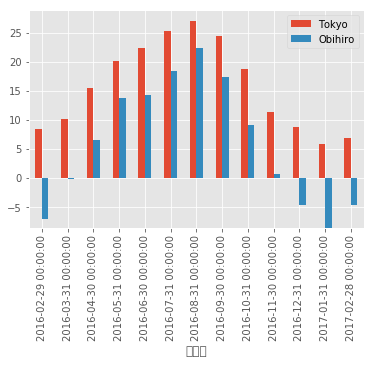

In [ ]:
df_mean.plot.bar() #棒グラフ
plt.legend(['Tokyo','Obihiro'])

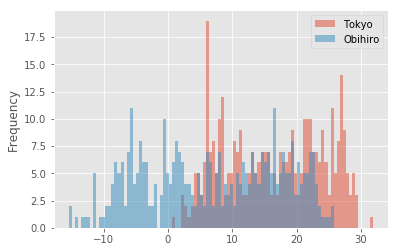

In [14]:
df.plot.hist(bins=100, alpha=0.5) #ヒストグラム（出現頻度）をプロット
plt.legend(['Tokyo','Obihiro'])

# 実際編
フリーのデータからデータ解析をしてみましょう。